# Task 1: Transformasi Affine

#### Fathurrahman Ikhsan
#### 1313617022

In [259]:
import matplotlib.pyplot as plt
import numpy as np
import string

Transformasi Affine adalah hubungan geometri yang mempertahankan bentuk dasar dan integritas bangun geometri. Transformasi Affine dapat berupa rotasi, translasi, dan dilatasi. Transformasi affine tidak mengawetkan kesebangunan. Hal ini dikarenakan factor pengali pada x tidak sama dengan pengali pada y. Berikut adalah matriks 2D yang akan menjadi titik-titik koordinat persegi yang akan dioperasikan dengan beberapa transformasi

In [260]:
A = np.array([[-1, 1 ,1],
                [1, 1, 1],
                [1, -1, 1],
                [-1, -1, 1]])

array([[-1,  1,  1],
       [ 1,  1,  1],
       [ 1, -1,  1],
       [-1, -1,  1]])

## Scaling (Dilatasi)

Dilatasi juga dikenal dengan sebagai perbesaran atau pengecilan sebuah objek.

Apabila transformasi pada translasi, refleksi, serta rotasi hanya mengubah posisi benda, maka lain halnya dengan dilatasi yang melakukan transformasi geometri dengan cara merubah ukuran benda.

Ukuran benda bisa akan dibuah oleh dilatasi menjadi lebih besar atau lebih kecil. Perubahan ini bergantung pada skala yang menjadi faktor dari pengalinya.

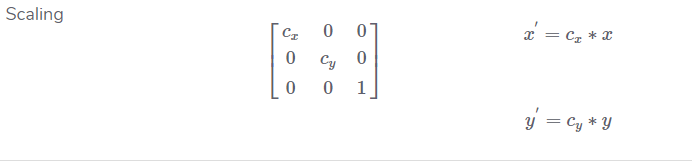

In [250]:
def d2scaling(matrix, cx, cy):
    mscaling = np.array([[cx, 0, 0],
                        [0, cy, 0],
                        [0, 0, 1]])
    mtrans = matrix.transpose()
    result = (mscaling @ mtrans)
    result = result.transpose()
    return result

## Translasi

Translasi adalah salah satu jenis transformasi yang berguna untuk memindahkan suatu titik sepanjang garis lurus dengan arah dan jarak.

Yang berarti, translasi tersebut hanya akan mengalami perpindahan titik.

Penentuan hasil objek lewat translasi cukup mudah. Caranya hanya dengan cara menambahkan absis serta ordinat dengan jarak tertentu sesuai dengan ketentuan tertentu.

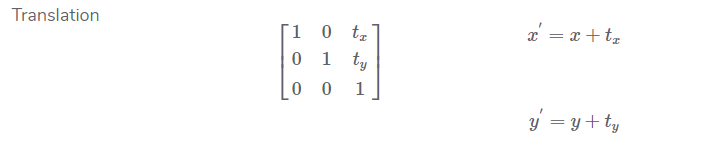

In [251]:
def d2translating(matrix, tx, ty):
    mtranslating = np.array([[1, 0, tx],
                            [0, 1, ty],
                            [0, 0, 1]])
    mtrans = matrix.transpose()
    result = (mtranslating @ mtrans)
    result = result.transpose()
    return result

## Rotasi

Rotasi atau perputaran adalah sautu perubahan kedudukan atau posisi objek dengan cara diputar lewat suatu pusat dan sudut tertentu.

Besarnya rotasi dalam transformasi geometri sebesar α yang telah disepakati untuk arah yang berlawanan dengan arah jalan jarum jam.

Apabila arah perputaran rotasi pada sebuah benda searah dengan jarum jam, maka sudut yang dibentuk yaitu -α.

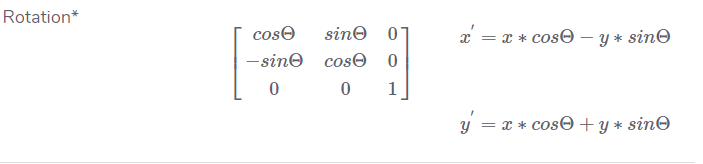

In [252]:
def d2rotating(matrix, angle):
    mrotation = np.array([[np.cos(angle * np.pi/180), -np.sin(angle * np.pi/180), 0],
                        [np.sin(angle * np.pi/180), np.cos(angle * np.pi/180), 0],
                        [0, 0, 1]])
    mtrans = matrix.transpose()
    result = (mrotation @ mtrans)
    result = result.transpose()
    return result

## Projecting

Proyeksi adalah transformasi linier pada vektor homogen yang diwakili oleh matriks 3×3 non-singular. matriks non-singular adalah matriksyang bisa diinvers yang mana nilai determinan dari matriks tersebut tidak sama dengan 0. kita bisa menuliskan persamaannya menjadi x' = H x

kita dapat menyatakan matriks proyeksi sebagai berikut:
projective transformasi
[x', y', 1]=[[a11, a12, a13],
             [a21, a22, a23],
             [a31, a32, v  ]] @ [x, y, 1]
             
Projective transformation itu punya 8 derajat kebebasan dikarenakan v = 1 atau 0. Dalam website ini Part II: Projective Transformations in 2D dijelaskan bahwa matriks H memiliki empat matriks dalam rantai matriks, projective matriks dapat kita sederhanakan menjadi:

projective transformasi
[wx', wy', w]=[[1,   0, 0],
               [0,   1, 0],
               [v1, v2, v]] @ [x, y, 1]

In [253]:
def d2projecting(matrix, p1, p2):
    mprojecting = np.array([[1, 0, 0],
                            [0, 1, 0],
                            [p1, p1, 1]])
    mtrans = matrix.transpose()
    result = (mprojecting @ mtrans)
    result = result / result[2]
    result = result.transpose()
    return result

## Fungsi untuk memplot gambar

In [261]:
#FUNGSI PLOT GAMBAR SEBELUM TRANSFORMASI

def plot_beforeTransform(matrix):
    dot = list(string.ascii_letters)
    ax = plt.gca()
    i = 0
    xs = []
    ys = []
    for row in matrix:
        x, y, w = row
        xs.append(x)
        ys.append(y)
        plt.scatter(x, y)
        plt.annotate(dot[i], (x+0.1, y+0.1))
        i += 1
    xs.append(matrix[0][0])
    ys.append(matrix[0][1])
    plt.plot(xs, ys, color="gray", linestyle="dotted")
    ax.set_xticks(np.arange(-3, 4, 1))
    ax.set_yticks(np.arange(-3, 4, 1))
    plt.title("before")
    plt.grid()
    plt.show()

In [262]:
#FUNGSI PLOT GAMBAR SETELAH TRANSFORMASI

def plot_afterTransform(matrix):
    dot = list(string.ascii_letters)
    for i in range(len(dot)):
        dot[i] = dot[i] + "`"
    ax = plt.gca()
    i = 0
    xs = []
    ys = []
    for row in matrix:
        x, y, w = row
        xs.append(x)
        ys.append(y)
        plt.scatter(x, y)
        plt.annotate(dot[i], (x+0.1, y+0.1))
        i += 1
    xs.append(matrix[0][0])
    ys.append(matrix[0][1])
    plt.plot(xs, ys, color="gray", linestyle="dotted")
    ax.set_xticks(np.arange(-3, 4, 1))
    ax.set_yticks(np.arange(-3, 4, 1))
    plt.title("after")
    plt.grid()
    plt.show()

### Matriks A yang diplot menjadi koordinat persegi

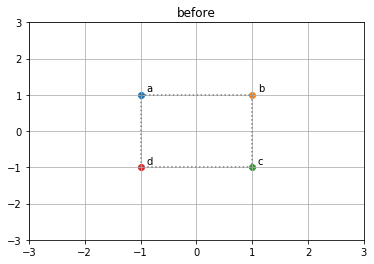

In [256]:
plot_beforeTransform(A)

### Matriks A setelah Scaling (Dilatasi)

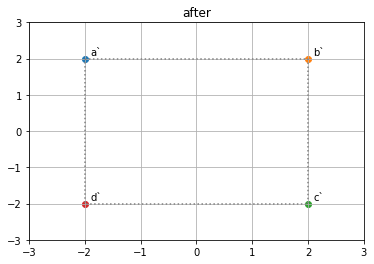

In [235]:
#SCALING

matrix_scaling = d2scaling(A, 2, 2)
plot_afterTransform(matrix_scaling)

### Matriks A setelah Translasi

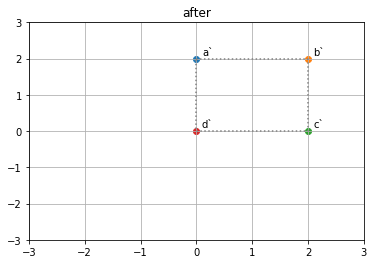

[[0 2 1]
 [2 2 1]
 [2 0 1]
 [0 0 1]]


In [237]:
#TRANSLATING

matrix_translating = d2translating(A, 1, 1)
plot_afterTransform(matrix_translating)
print(matrix_translating)

### Matriks A setelah Rotasi

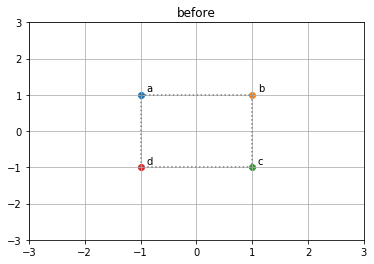

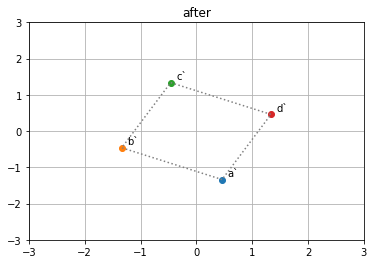

In [239]:
#ROTATING

plot_beforeTransform(A)
matrix_rotating = d2rotating(A, 154)
plot_afterTransform(matrix_rotating)

### Matriks A setelah Projecting

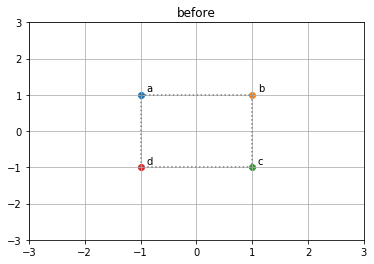

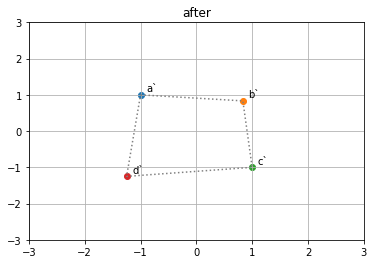

In [246]:
#PROJECTING
plot_beforeTransform(A)
matrix_projecting = d2projecting(A, 0.1, 0.3)
plot_afterTransform(matrix_projecting)